In [1]:
import numpy as np
import matplotlib.pyplot as plt

# データの読み込み

まずはKOI-2の光度曲線データ koi2.txt を読み込んでみよう（RVは視線速度Radial Velocityの略）。[教材4-1](https://utokyo-ipp.github.io/4/4-1.html)のような方法もあるが、ここでは pandas というパッケージを使う。

In [2]:
import pandas as pd

read_csv は、カンマ（,）記号で区切られたCSV（Comma Separated Value）形式のデータを読み込む関数である。comment="#"は、#から始まる行はコメントとして無視することを指示している（ファイルを直接開いて見てみよう）。さらに引数に delimiter="|" などと指定すれば、カンマ以外で区切られたデータ（この例では|）も同様に読めて便利である。

In [3]:
data = pd.read_csv("koi2.txt", comment="#")

In [4]:
data

,time,flux,flux_error
0,352.597548,0.999927,0.000025
1,352.658847,0.999818,0.000025
2,352.679280,0.999912,0.000025
3,352.720146,0.999905,0.000025
4,352.740579,0.999822,0.000025
...,...,...,...
3535,442.300804,0.999664,0.000025
3536,442.321239,0.999760,0.000025
3537,442.341673,0.999770,0.000025
3538,442.362107,0.999811,0.000025


最初の行はヘッダーとして扱われ、列の名前になる。辞書（[教材3-1](https://utokyo-ipp.github.io/3/3-1.html)）と同様に、列の名前をキーとしてデータを参照できる。今回のデータは、
- time: 時間（単位は日）
- flux: 恒星の明るさの相対値
- flux_error: 恒星の明るさの測定誤差（今回は使わない）

を含んでいる。

今回は恒星の明るさと時間の関係を知りたいので、timeとfluxを配列として取り出しておく。

In [5]:
x = np.array(data["time"])
y = np.array(data["flux"])

Matplotlibでプロットしてみよう。前回と同様に日本語が使えるようにしておこう。

In [6]:
!pip install japanize_matplotlib
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 22.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=7017cf4fca3d789b1ccc0842ad73d63ea25f2c9e4931339773cb5065cd993e73
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


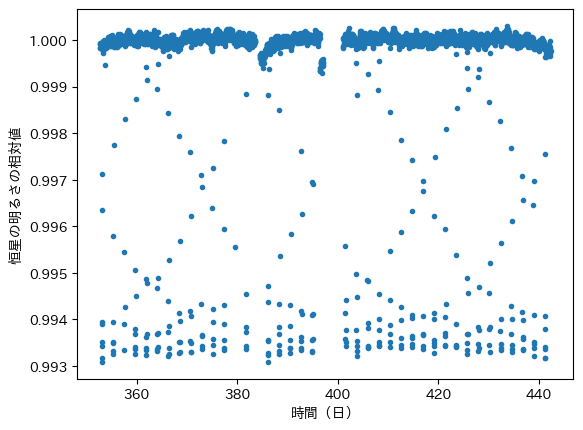

In [7]:
plt.xlabel("時間（日）")
plt.ylabel("恒星の明るさの相対値") # 相対値なので単位は不要
plt.plot(x, y, ".");

# トランジットの確認

上のグラフを見ると明らかに明るさが変化しているが、範囲が広すぎて見づらい。一部を拡大してプロットしてみよう。pyplotの関数xlimを使うと、x方向の範囲を指定できる。

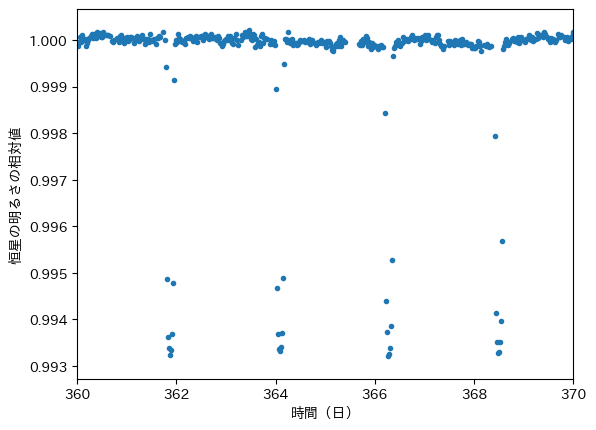

In [8]:
plt.xlim(360, 370) # xの最小値, xの最大値
plt.xlabel("時間（日）")
plt.ylabel("恒星の明るさの相対値") # 相対値なので単位は不要
plt.plot(x, y, ".");

ここでは4回のトランジットが見えている。xlimの範囲を調整してどこか一回分を表示してみよう。

#### 例

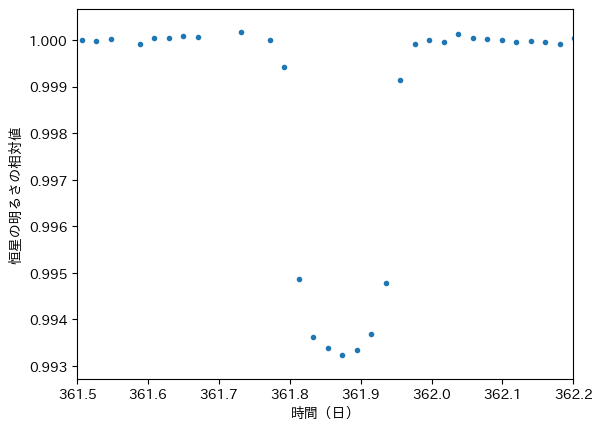

In [9]:
plt.xlim(361.5, 362.2)
plt.xlabel("時間（日）")
plt.ylabel("恒星の明るさの相対値")
plt.plot(x, y, ".");

# 課題

この惑星の公転周期$P$は2.20473547日である（[Masuda 2015](https://iopscience.iop.org/article/10.1088/0004-637X/805/1/28) の値）。前回視線速度データでやったのと同様にして、$y$を縦軸、時間を$P$で割ったあまりを横軸に取ってプロットし、トランジットによる明るさの減少がこの周期で生じていることを確かめてみよう。軸のラベルも適切に記入すること。

In [10]:
P = 2.20473547 # 公転周期（日）

#### 視線速度のデータと同様にできる

In [11]:
t_amari = x % P

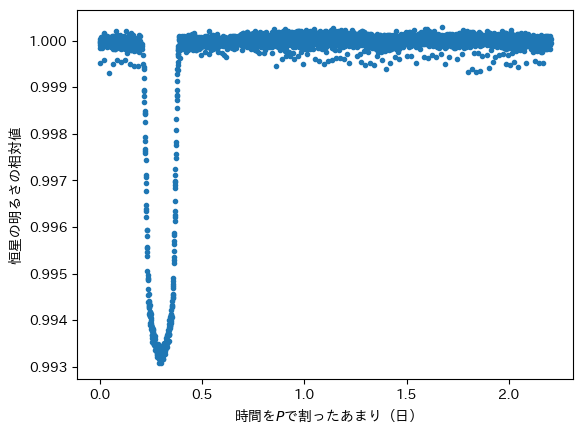

In [12]:
plt.xlabel("時間を$P$で割ったあまり（日）") # ラベル中に数式を使うこともできる。その場合は$$で挟む。
plt.ylabel("恒星の明るさの相対値")
plt.plot(t_amari, y, ".");

トランジットの周辺を拡大したプロットも作ってみよう。

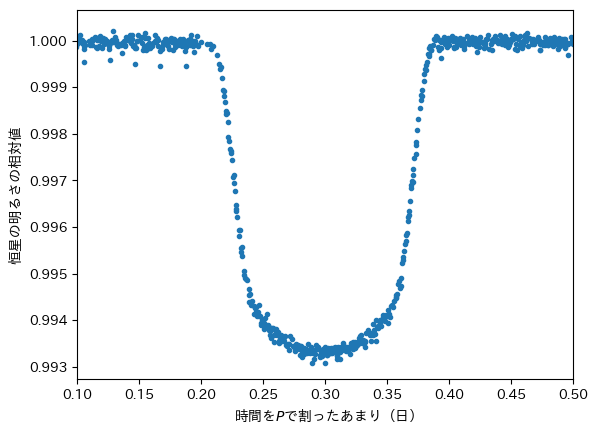

In [13]:
# xlimを使えばよい
plt.xlim(0.1, 0.5)
plt.xlabel("時間を$P$で割ったあまり（日）")
plt.ylabel("恒星の明るさの相対値")
plt.plot(t_amari, y, ".");

# 課題
余裕があれば以下もやってみよう。

**1. トランジットによる減光の量（トランジットの深さと呼ぶ）は、惑星の半径と恒星の半径の比で決まっている。グラフからトランジットの深さ$\delta$を読み取り（目分量で構わない）、惑星の半径と恒星の半径の比を見積もってみよう（スライド37ページ参照）。**

上のグラフから、$\delta=0.0065$としてみよう。授業で触れたように、正確には周辺減光の効果（トランジットの底が丸くなる効果）を考慮する必要があるのでここでは大体でよい。惑星の半径を$r$、恒星の半径を$R$とすると$r/R=\sqrt{\delta}$である。計算は以下のようにPython上で行うとよい。

In [14]:
delta = 0.0065 # 自分で文字を定義する

In [15]:
radius_ratio = np.sqrt(delta) # numpy.sqrt()で正の平方根を計算

In [16]:
radius_ratio

0.0806225774829855

**2. 太陽の半径は $R_\mathrm{sun}=6.957 \times 10^8\,\mathrm{m}$, 木星の半径は $R_\mathrm{jup}=7.149 \times 10^7\,\mathrm{m}$（修正済み）である。木星と太陽の半径の比$R_\mathrm{jup}/R_\mathrm{sun}$はいくらか？**

割り算をすればよい。以下のようにできる。

In [17]:
jupiter_to_sun =  7.149e7 / 6.957e8

In [18]:
jupiter_to_sun

0.10275981026304441

おおよそ木星の大きさ（半径）は太陽の10分の1、地球の大きさは木星のさらに10分の1（つまり太陽の100分の1）くらいになっている。

**3. この恒星（KOI-2）の半径は太陽の2.0倍である。1,2の値をもとに、この惑星の半径が木星の何倍か計算してみよう。**

1では惑星と恒星の半径の比$r/R$を計算した。これに$R=2R_\mathrm{sun}$をかけると惑星の半径になる。それを$R_\mathrm{jup}$で割ったものが答えである。よって
$$
    {r\over R} \times 2R_\mathrm{sun} \times {1 \over R_\mathrm{jup}}
    = 2 \times {r\over R} \times {1 \over {R_\mathrm{jup}/R_\mathrm{sun}}}
$$
を計算すればよい。

In [19]:
2 * radius_ratio / jupiter_to_sun

1.5691460946961258

ということで、木星よりやや大きな惑星であることがわかった。恒星の近傍を公転する木星型惑星（ホットジュピターと呼ばれる）には一般に半径がやや膨らんだ傾向がある。

**4. （これは上の1-3とは無関係）「明るさ vs 時間を$P$で割ったあまり」の図で、トランジット以外の部分の明るさの変化を拡大して調べてみよう。**

トランジット除いた一周期分の変動を見てみる。

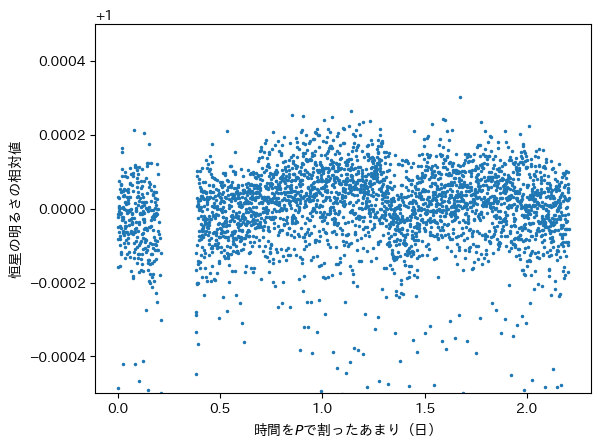

In [20]:
plt.ylim(0.9995, 1.0005)
plt.xlabel("時間を$P$で割ったあまり（日）")
plt.ylabel("恒星の明るさの相対値")
plt.plot(t_amari, y, ".", markersize=3);

$x=1.4$付近にくぼみがあり、そこに近づく/遠ざかるに従って明るさが少し増加しているのが一応は見えると思う。

このプロットだと各時刻におけるばらつきで傾向が見づらい。ある時間間隔で平均（binning, ビニングという）したデータ点をプロットすると、ばらつきが抑えられ傾向が見やすくなる。自分で時間平均をとるプログラムを書くこともできるが（興味があればやってみよう）、例えば scipy.statsのbinned_statisticという関数を使うと以下のようにすぐできる。

In [21]:
from scipy.stats import binned_statistic

In [22]:
values, bin_edges, _ = binned_statistic(t_amari, y, bins=50)
# binsではビン（ここでは入れもののような意味）の数を指定している。

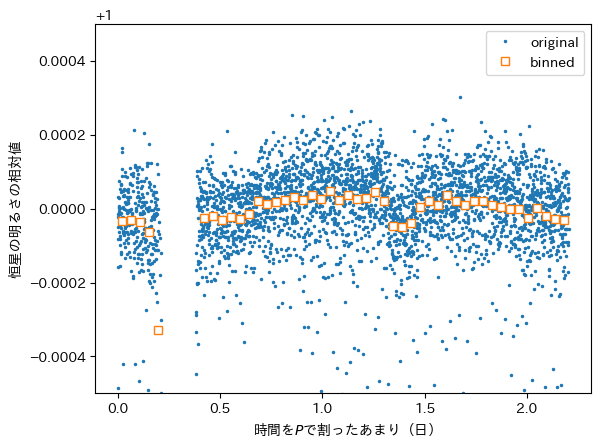

In [23]:
plt.ylim(0.9995, 1.0005)
plt.xlabel("時間を$P$で割ったあまり（日）")
plt.ylabel("恒星の明るさの相対値")
plt.plot(t_amari, y, ".", markersize=3, label='original')
plt.plot(0.5*(bin_edges[1:]+bin_edges[:-1]), values, 's', mfc='white', label='binned')
plt.legend(loc='best') # 凡例（データの説明）を追加, loc='best'は位置を最適に決めるというオプション

ビニングしたデータではよりはっきりと傾向が見える。惑星の恒星に照らされた側の半球は、光を反射する、または吸収して高温になることで明るくなる。トランジットが生じる半周期後にはこの明るい面（「満月」の状態）が恒星の後ろに隠れるので暗くなって見える。そこに到達するまでの明るさの変化は、惑星の「満ち欠け」によるものである。

これをより明確に見るために、横軸を視線速度の場合と同様軌道の位相（周期$P$の単位で測った時間）に変換してみよう。さらに見やすいようにトランジットの時刻が大体$0$になるように目分量でずらしておく。

In [24]:
phase = (x - 0.27) % P / P

In [25]:
values, bin_edges, _ = binned_statistic(phase, y, bins=50)

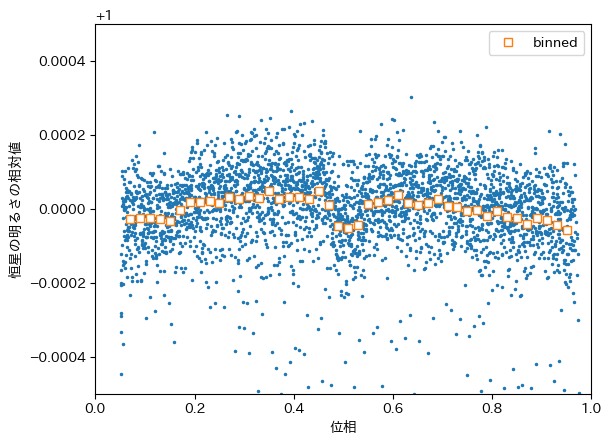

In [26]:
plt.xlim(0, 1)
plt.ylim(0.9995, 1.0005)
plt.xlabel("位相")
plt.ylabel("恒星の明るさの相対値")
plt.plot(phase, y, ".", markersize=3)
plt.plot(0.5*(bin_edges[1:]+bin_edges[:-1]), values, 's', mfc='white', label='binned')
plt.legend(loc='best');

惑星が後ろに隠れる減光は確かに位相が$0.5$（トランジットの反対側）で生じていることがわかる。

## おまけ：グループ分け

In [27]:
nums = np.arange(1,18) # 17人いるので1-17までの配列を作る

In [28]:
nums

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [29]:
np.random.seed(123)
np.random.permutation(nums) # np.random.permutation()はランダムに順列（permutation）を作る関数。

array([ 5, 10, 17,  9,  6,  8,  1, 11, 12,  4,  2,  7, 16, 13,  3, 15, 14])

出てきた配列を前から4人または5人に分けてグループを作った。np.random.seed(123)では、乱数の種（seed）を指定している（123は適当に選んだ値）。これを指定しないでnp.random.permutation()を実行すると、結果は毎回異なる（ちゃんと"ランダム"になる）。乱数の種を指定すると毎回同じ結果になり、"再現性のある乱数"になる（つまり本当の意味での"ランダム"にはなっておらず、コンピュータ内ではあるアルゴリズムに従って結果が生成されている）。